# Workshop 2 - Jupyter Notebook Basics, Preprocessing, and Neural Oscillations

## Setup and JN Basics

# Jupyter Notebook Basics
- If you want to run the entire notebook, do Cell > Run All 
- You can use shift+enter to run each individual cell or clicking into the cell that you want to run and pressing "Run" above
- The current cell that is being run depends on the cells that have been run before it (i.e. import statements)
- If you download something new on your terminal, restart the kernel Kernel > Restart

## Install MNE

Install MNE on the command line (for Mac users)
- pip3 install mne --upgrade
- git clone git://github.com/mne-tools/mne-python.git
- cd mne-python
- python setup.py develop

Install MNE on the command line using conda (for Windows)
- conda create --name=mne --channel=conda-forge mne
- conda install --name base nb_conda_kernels

## Pooch Module Error
If you are running into this error try
- pip install -U https://github.com/mne-tools/mne-python/archive/refs/heads/main.zip

In [1]:
import mne
mne.datasets.somato.data_path() # fetching somatosensory data

'/Users/priyanshi_nigam/mne_data/MNE-somato-data'

## Loading and Viewing Raw Data

In [2]:
# FIF Files
path = mne.datasets.somato.data_path() + '/sub-01/meg/sub-01_task-somato_meg.fif'  
raw = mne.io.read_raw_fif(path)

Opening raw data file /Users/priyanshi_nigam/mne_data/MNE-somato-data/sub-01/meg/sub-01_task-somato_meg.fif...
    Range : 237600 ... 506999 =    791.189 ...  1688.266 secs
Ready.


In [3]:
raw.info.get('nchan') # number of channels 

316

Using matplotlib as 2D backend.


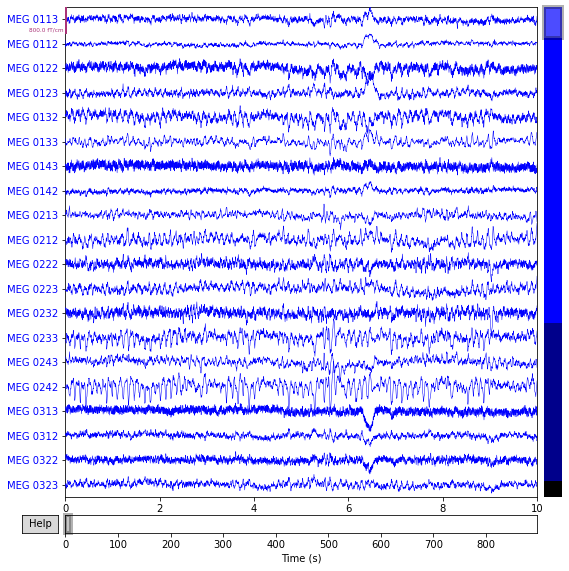

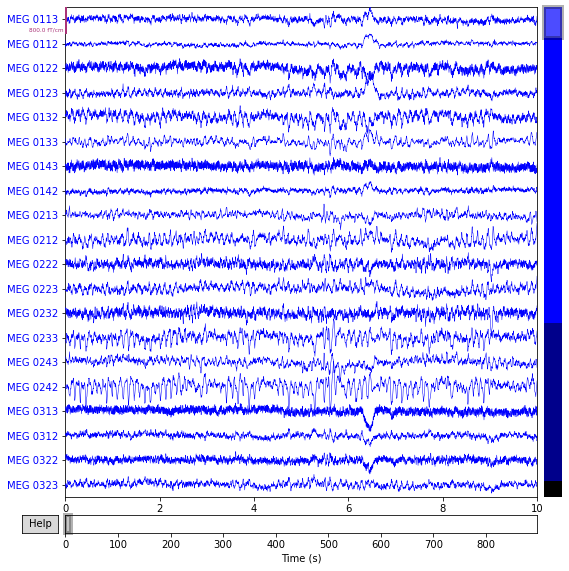

In [4]:
raw.plot() # here's the initial data before processing it

In [5]:
# EDF Files
path = mne.datasets.eegbci.load_data(1, 1) # Note: 1.2 MB  
path[0]  
# You can double check that the file is there by doing `cat path[0]`
# to see the file contents. It'll look like a bunch of random characters and question marks

'/Users/priyanshi_nigam/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R01.edf'

In [17]:
# load the EDF file
raw = mne.io.read_raw_edf(path[0], preload=True)   

Extracting EDF parameters from /Users/priyanshi_nigam/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., Cz.., C2.., C4.., C6.., Cp5., Cp3., Cp1., Cpz., Cp2., Cp4., Cp6., Fp1., Fpz., Fp2., Af7., Af3., Afz., Af4., Af8., F7.., F5.., F3.., F1.., Fz.., F2.., F4.., F6.., F8.., Ft7., Ft8., T7.., T8.., T9.., T10., Tp7., Tp8., P7.., P5.., P3.., P1.., Pz.., P2.., P4.., P6.., P8.., Po7., Po3., Poz., Po4., Po8., O1.., Oz.., O2.., Iz..
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...


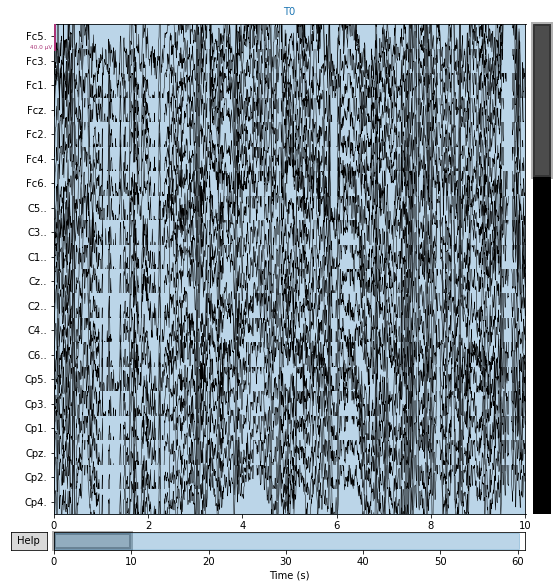

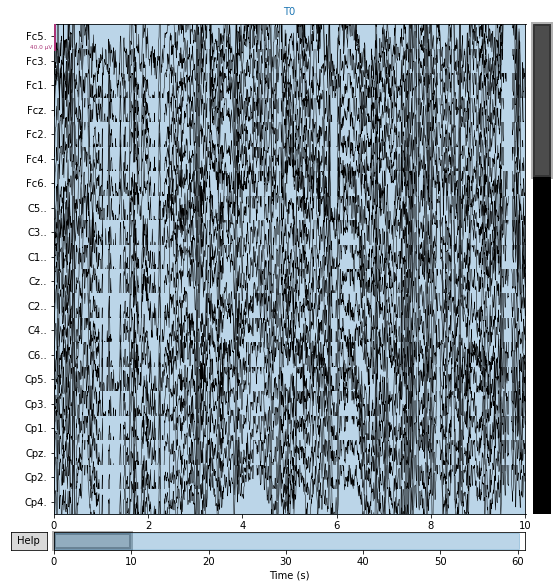

In [18]:
# see the data
raw.plot()

## Referencing and Artifact Rejection

In [19]:
raw.set_eeg_reference()  # set reference

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<RawEDF | S001R01.edf, 64 x 9760 (61.0 s), ~4.8 MB, data loaded>

Effective window size : 12.800 (s)


<ipython-input-21-a5fcf744740b>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


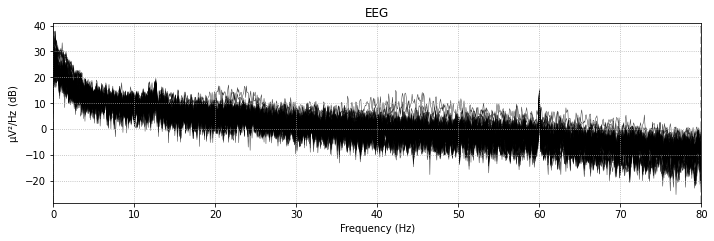

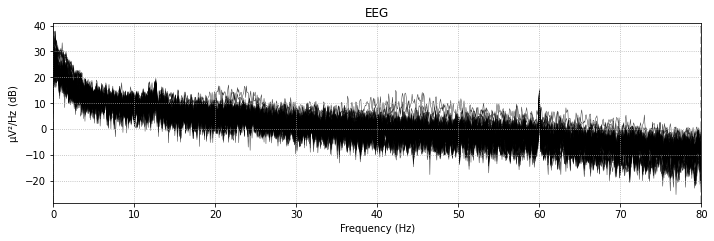

In [21]:
raw.plot_psd()

In [22]:
filtered = raw.filter(0.5, 30)   

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1057 samples (6.606 sec)



Effective window size : 12.800 (s)


<ipython-input-23-d18e78463ba3>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  filtered.plot_psd()


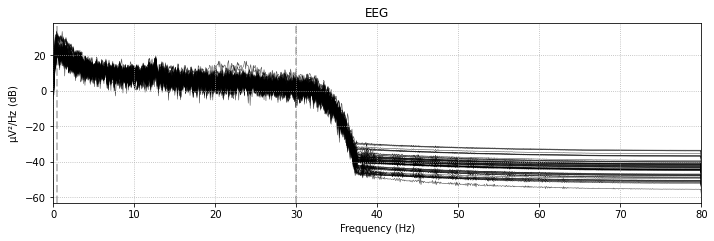

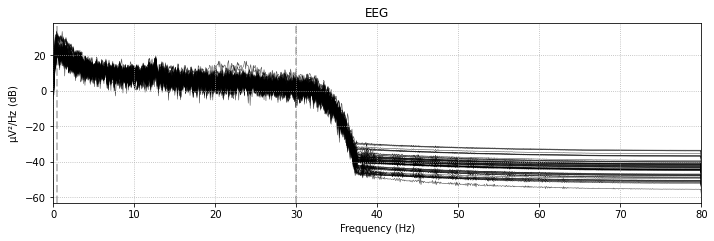

In [23]:
filtered.plot_psd()